In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

## Example: Calculate the area of a circle

Area= 12.539200, pi=3.134800


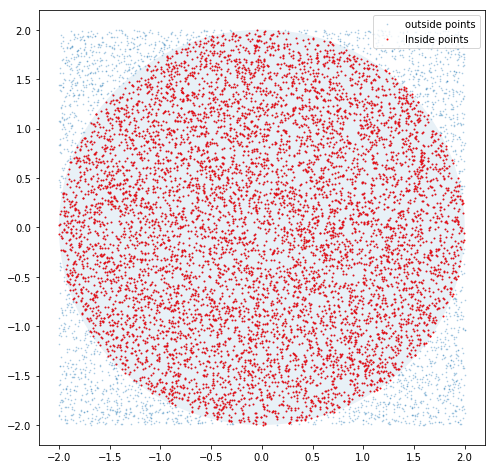

In [5]:
# http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-3.html
plt.figure(figsize=(8,8))

radius = 2

N = 10000    # Use 10000 points
# Random numbers from -radius to radius
X = np.random.uniform(low=-radius, high=radius, size=N) 
Y = np.random.uniform(low=-radius, high=radius, size=N) 

plt.scatter(X,Y, s=.5, alpha=0.3, label='outside points')

# Drawing a circle
crc = plt.Circle([0, 0], radius=radius, alpha=0.1)
fig = plt.gcf()
fig.gca().add_artist(crc)

# Calculate the distance from the center
R = np.sqrt(X**2+Y**2)
plt.scatter(X[R<radius], Y[R<radius], c='r', s=1, alpha=0.9, label='Inside points')

# This is the big box
Abox = (2.0*radius)**2

# Ninside = 0
# Noutside = 0
# for i in np.arange(0,N):
#     if R[i] <= 1:
#         Ninside += 1
#     else:
#         Noutside += 1

# Alternative and faster
Ninside = np.sum(R<radius)
Area = Abox * Ninside/N
plt.legend()

print("Area= {:f}, pi={:f}".format(Area, Area/radius**2))

### Example: Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $

In [6]:
def f(x):
    return x**2 + 4*x*np.sin(x)

def intf(x):
    return x**3/3.0 + 4.0*np.sin(x) - 4.0*x*np.cos(x)

In [7]:
a = 2; b =3;

X = np.random.uniform(low=a, high=b,size=N)
Y = f(X)

Imc = (b-a) * np.sum(Y)/N

exactval = intf(b) - intf(a)

print("Monte Carlo estimation={:f}\nExact number={:f}".format(Imc, exactval))

Monte Carlo estimation=11.806423
Exact number=11.811359


## Mutlidimensional integral.
Example: Calculate the two dimensional integral $I=\int \int f(x, y) dx dy$ where $f(x,y) = x^2 +y^2$
over the region deﬁned by the condition $x^2 +y^2 ≤ 1$


In [8]:
fmd = lambda x,y: x*x + y*y
radius = 1
# use N draws
N = 8000
X = np.random.uniform(low=-radius, high=radius, size=N)
Y = np.random.uniform(low=-radius, high=radius, size=N)
Z=fmd(X, Y)

N = np.sum(Z < 1)
sumsamples = np.sum(Z[Z<1])
print("I = {:f}\nactual={:f}".format(np.pi*radius**2*sumsamples/N, np.pi/2))

I = 1.569993
actual=1.570796


## Monte-Carlo as a function of number of samples
How does the accuracy depends on the number of points(samples)? Lets try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points.



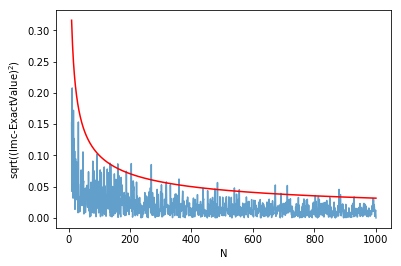

In [9]:
Imc = np.zeros(1000)
Na = np.linspace(0, 1000, 1000)

exactval = intf(b) - intf(a)

for N in np.arange(1, 1000):
    X = np.random.uniform(low=a, high=b, size=N)
    Y = f(X)
    
    Imc[N] = (b-a) * np.sum(Y)/N
    
plt.plot(Na[10:], np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), 'r')
plt.xlabel('N')
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")

Obviously this depends on the number of $N$ as $1/\sqrt{N}$.

## Errors in MC

The Monte Carlo methods yield approximate answers whose accuracy depends on the number of draws. So far, we have used our knowledge of the exact value of various integrals to determine that the error in the Monte Carlo method approaches zero as approximately $1/\sqrt{N}$ for large $N$, where $N$ is the number of trials. In the following, we will ﬁnd how to estimate the error when the exact answer is unknown. The $N$ dependence of the error is independent of the nature of the integrand and, most importantly, independent of the number of dimensions.

Consider the Monte Carlo evaluation of the integral we saw above $ f(x)=x^2 + 4 \, x \,\sin(x)$ in the interval $[2,3]$ which takes the value 11.8113589251. We can estimate this as we did above example by comparing to the exact value. How can we estimate the error if the exact result is unknown? How can we know if $N = 10^5$ trials is sufficient to achieve the desired accuracy? Of course, we cannot answer these questions deﬁnitively because if the actual error in $\hat{I}$ were known, we could correct it by the required amount and obtain $I$. The best we can do is to calculate the probability that the true value $I$ is within a certain range centered on $\hat{I}$.

We can do this either analytically or by repeating the experiment $m$ times and determine an empirical distribution. From that we can estimate the confidence intervals.

So, lets repeat the same evaluation $m$ times and check the variance of the estimate.

11.811174113 0.00387305748099


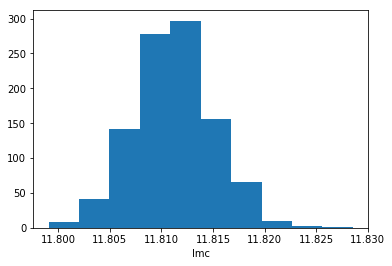

In [10]:
# Multiple MC estimations
m = 1000
N = 10000
Imc = np.zeros(m)

for i in np.arange(0, m):
    X = np.random.uniform(low=a, high=b, size=N)
    Y = f(X)
    Imc[i] = (b-a) * np.sum(Y)/N
    
plt.hist(Imc)
plt.xlabel("Imc")
print(np.mean(Imc), np.std(Imc))



One way to obtain an estimate for the error is to make  runs of $N$ trials each. Each run of $N$ trials yields a mean or measurement that we denote as $M_a$. As we shown above (and is expected)these measurements are not equal because each measurement uses a different finite sequence of random
numbers and inherently has an error itself. Qualitatively, the magnitude of
the differences between the measurements is similar to the actual errors per measurement, and hence these differences are a measure of the error associated with a single measurement. To obtain a quantitative measure
of this error, we determine the differences of these measurements using the standard deviation of the means $\sigma_m$ which is deﬁned as:

$$ \sigma_m^2= \langle M^2 \rangle- \langle M \rangle ^2 $$

where 

$$ \langle M \rangle = \frac{1}{m} \sum_{a=1}^{m} M_a $$

and

$$ \langle M^2 \rangle = \frac{1}{m} \sum_{a=1}^{m} M_a^2 $$


Although $\sigma_a$ gives an estimate of the probable error, this method of obtaining $\sigma_a$ by making additional measurements is impractical because we could have combined the additional measurements to make a better estimate.

One can show that:

$$ \sigma_m^2 \approx \frac{\sigma^2}{N} $$

where 

$$ \sigma^2= \langle f^2 \rangle - \langle f \rangle ^2 $$

which is the actual variance of the function (this will become very important later) 

Finally:
$$ \sigma_m^2 \approx \frac{\langle f^2 \rangle - \langle f \rangle ^2 }{N} $$


Therefore, in the Monte Carlo integration using $N$ samples, the error is
 
$$ \sigma_I =  \sqrt{\frac{\langle f^2\rangle- \langle f\rangle^2}{N}} .$$


which is the same for any dimensional space. 

One way to verify the relation  is to divide the initial measurement of $N$ trials into $s$ subsets. This procedure does not require additional measurements. We denote the mean value of
$f(x_i)$ in the $k$th subset by $S_k$. As an example, we divide the 10,000 trials of the ﬁrst measurement into $s = 10$ subsets of $N/s = 1000$ trials each.  A reasonable candidate for a measure
of the error is the standard deviation of the means of each subset. We denote this quantity as $\sigma_s$ where

$$ \sigma_s^2 = 	\langle S \rangle ^2 −	\langle S ^2 \rangle $$

where the averages now are over the subsets. Obviously we would like to
deﬁne an error estimate that is independent of how we subdivide the data. This quantity is not $\sigma_s$ but but the ratio $\sigma_s/\sqrt{s}$ and when $s$ goes to $n$ we have the required results. 


### Example: Errors on a d-dimensional integral

We integrate:

$$ g(x_1,x_2...x_d) = (\sum_{i=1}^{d} x_i)^2 $$

In [11]:
g = lambda x: np.sum(x, axis=0)**2

def calculate_errors(N):
    nrepeats = 100
    ndims = 10
    intg = np.zeros(nrepeats)
    e = np.zeros(ndims)
    for d in range(ndims):
        for k in range(nrepeats):
            x = np.random.rand(d+1, N)
            y = g(x)
            intg[k] = np.mean(y)
        e[d] = np.std(intg)
    return e

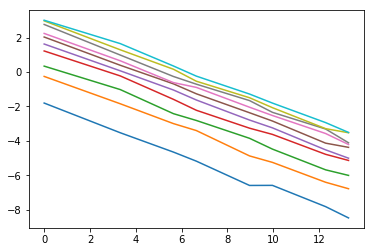

In [12]:
inputns=[1,10, 50, 100,500, 1000, 5000, 10000]
errors = np.array([calculate_errors(n) for n in inputns])

plt.figure()
for i in range(10):
    plt.plot(np.log2(inputns), np.log2(errors[:,i]))